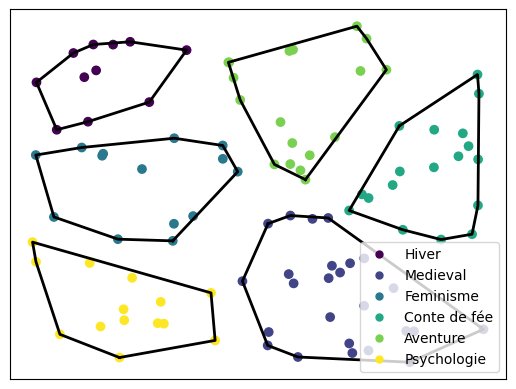

<Figure size 6400x4800 with 0 Axes>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import ConvexHull
import matplotlib.lines as mlines

# Generate random data points
np.random.seed(0)
num_points = 100
categories = ['Hiver', 'Medieval', 'Feminisme', 'Conte de fée', 'Aventure', 'Psychologie']
points = np.random.rand(num_points, 2)
labels = np.random.choice(categories, num_points)

# Apply K-means clustering
kmeans = KMeans(n_clusters=len(categories), random_state=0)
kmeans.fit(points)
cluster_labels = kmeans.labels_

# Create a scatter plot with cluster colors
scatter = plt.scatter(points[:, 0], points[:, 1], c=cluster_labels, cmap='viridis')


# Add visual borders between clusters
for cluster in range(len(categories)):
    cluster_points = points[cluster_labels == cluster]
    hull = ConvexHull(cluster_points)
    plt.plot(np.append(cluster_points[hull.vertices, 0], cluster_points[hull.vertices[0], 0]),
             np.append(cluster_points[hull.vertices, 1], cluster_points[hull.vertices[0], 1]), 'k-', lw=2)

# Create legend handles and labels
legend_handles = []
for i, category in enumerate(categories):
    legend_handles.append(mlines.Line2D([], [], color=scatter.cmap(scatter.norm(i)), marker='.', linestyle='None',
                                        markersize=10, label=category))

# Add legend of categories
plt.legend(handles=legend_handles)

# Remove axis graduations
plt.xticks([])
plt.yticks([])

# Increase resolution
plt.figure(dpi=1000)



# Show the plot
plt.show()